# CIPHER PROCESSING

In [2]:
#import number and plotting functions
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Set up Useful Variables
We are going to need an alphabet, a key, a place to hold the cipher text and a place to hold the plain text once it has been decrypted.

In [3]:
#going to need an alphabet at some stage
alphabet=[]

x=0
while x<26:
    alphabet.append(chr(65+x))
    x+=1

print(alphabet)
print(len(alphabet))


['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
26


In [4]:

#and build it into string form too
alphabet_string=""
for x in alphabet:
    alphabet_string=alphabet_string+x
print(alphabet_string)
print(len(alphabet_string))

ABCDEFGHIJKLMNOPQRSTUVWXYZ
26


In [5]:
#going to need to know how each letter is decoded, 
#we don't know what this is yet so let's make them all hyphens.
#in order that we can make substitutions as we need to this
#has to be a list and not a string (immutable)
cipher_key=[]
for x in alphabet:
    cipher_key.append("-")
print(cipher_key)
print(len(cipher_key))

['-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
26


# Input the Cipher Text:

In [6]:
-

DYIMX MESTE ZDPNF VVAMJ RNPSG CIGRV VFSIA DICUY OGYFY FMQQI FYFSM LQFXF ZBUOC SOVME CWMDD BNXUE DCIAQ VHFZA GORPK ZCEWF RQJIA NKLQG IYERF XPQAD VPXTO RXTIU AZBFZ HQONB BPSGE PRITE ZYWGL VXDFA GOURA YMBPP SGCIY VZIEN IALVX DFAGO UXTPG OOCMQ GMGRR XFSML MRROS MNDPS GMCGD YIKOW AYKYZ OMECK EZOBU KKCAF KNXFR XJKUO RXUYI TKDIM YLGRZ WUDVB DRKMX MVPPS GEZLD FTXLG NQRQQ ZNPRV WEWQX OPSGC IYVZI EHMJS CPRTV QYLVE PTIOJ MZLAG KCIYL BRIFY TLDRL VIZHI EXVHE ZTRDL WEEIE DRKMT VVMRR XPBLY LLMGM GRVEP OZRCJ SRLVB DYIDD ISOYS GDMND RWYLT YNZWO ZCADF RAFZB BZKUY IYZIM OPIAN ZAUWT VXTPG OMGRV MPPVG SKCAQ IOBZX UDPQY LFXPI TOEXI ZZXSE KUYGB EIIYM IFCPW TLTYG VWMJN BEILG YLEOU XTZCF KEHRC IAMJX AMMCK ZHPTZ RMKPK EWNXR GOZCA DFJYJ KUYFW UYOVP PSGHI ADKSW YWJWF VQLJB EKXTP BEORG TPZLY WCAFZ FYTEX WMQPI MQYLF DYIZW MGEJQ QPBVX KLQAI EUSCF SMOBZ XUDPR WSEED GBXWV UOILK KIXPD RX
866


In [7]:
print(sqrt(421))

20.5182845287


# The cipher text could be a mixture of uppercase, lowercase and puntuation and spaces.  It is best to clean it up before processing.  Most cipher operations will be based on working on upper case.

In [8]:
#convert the cipher text to upper case
cipher_input=cipher_input.upper()
print (cipher_input)
print(len(cipher_input))

DYIMX MESTE ZDPNF VVAMJ RNPSG CIGRV VFSIA DICUY OGYFY FMQQI FYFSM LQFXF ZBUOC SOVME CWMDD BNXUE DCIAQ VHFZA GORPK ZCEWF RQJIA NKLQG IYERF XPQAD VPXTO RXTIU AZBFZ HQONB BPSGE PRITE ZYWGL VXDFA GOURA YMBPP SGCIY VZIEN IALVX DFAGO UXTPG OOCMQ GMGRR XFSML MRROS MNDPS GMCGD YIKOW AYKYZ OMECK EZOBU KKCAF KNXFR XJKUO RXUYI TKDIM YLGRZ WUDVB DRKMX MVPPS GEZLD FTXLG NQRQQ ZNPRV WEWQX OPSGC IYVZI EHMJS CPRTV QYLVE PTIOJ MZLAG KCIYL BRIFY TLDRL VIZHI EXVHE ZTRDL WEEIE DRKMT VVMRR XPBLY LLMGM GRVEP OZRCJ SRLVB DYIDD ISOYS GDMND RWYLT YNZWO ZCADF RAFZB BZKUY IYZIM OPIAN ZAUWT VXTPG OMGRV MPPVG SKCAQ IOBZX UDPQY LFXPI TOEXI ZZXSE KUYGB EIIYM IFCPW TLTYG VWMJN BEILG YLEOU XTZCF KEHRC IAMJX AMMCK ZHPTZ RMKPK EWNXR GOZCA DFJYJ KUYFW UYOVP PSGHI ADKSW YWJWF VQLJB EKXTP BEORG TPZLY WCAFZ FYTEX WMQPI MQYLF DYIZW MGEJQ QPBVX KLQAI EUSCF SMOBZ XUDPR WSEED GBXWV UOILK KIXPD RX
866


In [9]:
#removes everything except capital letters and 
#makes new cipher text string comprising of just capital letters
cipher_text=""
for x in cipher_input:
    if 64<ord(x)<91:
        cipher_text=cipher_text+x

print(cipher_text)
print(len(cipher_text))

DYIMXMESTEZDPNFVVAMJRNPSGCIGRVVFSIADICUYOGYFYFMQQIFYFSMLQFXFZBUOCSOVMECWMDDBNXUEDCIAQVHFZAGORPKZCEWFRQJIANKLQGIYERFXPQADVPXTORXTIUAZBFZHQONBBPSGEPRITEZYWGLVXDFAGOURAYMBPPSGCIYVZIENIALVXDFAGOUXTPGOOCMQGMGRRXFSMLMRROSMNDPSGMCGDYIKOWAYKYZOMECKEZOBUKKCAFKNXFRXJKUORXUYITKDIMYLGRZWUDVBDRKMXMVPPSGEZLDFTXLGNQRQQZNPRVWEWQXOPSGCIYVZIEHMJSCPRTVQYLVEPTIOJMZLAGKCIYLBRIFYTLDRLVIZHIEXVHEZTRDLWEEIEDRKMTVVMRRXPBLYLLMGMGRVEPOZRCJSRLVBDYIDDISOYSGDMNDRWYLTYNZWOZCADFRAFZBBZKUYIYZIMOPIANZAUWTVXTPGOMGRVMPPVGSKCAQIOBZXUDPQYLFXPITOEXIZZXSEKUYGBEIIYMIFCPWTLTYGVWMJNBEILGYLEOUXTZCFKEHRCIAMJXAMMCKZHPTZRMKPKEWNXRGOZCADFJYJKUYFWUYOVPPSGHIADKSWYWJWFVQLJBEKXTPBEORGTPZLYWCAFZFYTEXWMQPIMQYLFDYIZWMGEJQQPBVXKLQAIEUSCFSMOBZXUDPRWSEEDGBXWVUOILKKIXPDRX
722


# Caluclating Single-Letter Frequecies

In [10]:
#define a function to count over-lapping occurences of a sub-string in a string
def count_freq(string, word):
    start   = 0
    matches = 0

    while True:
        start = string.find (word, start) #find returns -1 on failure 
        if start < 0:
            break

        start   += 1
        matches += 1

    return matches



In [11]:
#set up letter frequency list to hold frequencies in alphabetical order
letter_freq=[]
for x in alphabet:
    letter_freq.append(count_freq(cipher_text,x))
print(letter_freq)
print(len(letter_freq))




[25, 21, 24, 31, 35, 31, 34, 8, 43, 13, 26, 28, 38, 15, 30, 36, 22, 37, 23, 23, 20, 30, 23, 33, 38, 35]
26


# Make Bar-Chart of Letter Frequencies

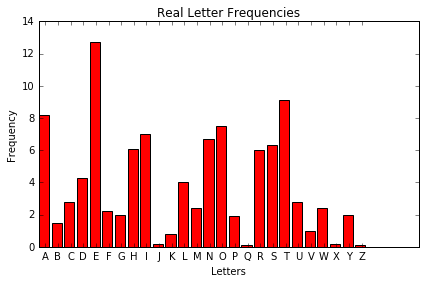

In [12]:
real_letter_freq=[8.2, 1.5, 2.8, 4.3, 12.7, 2.2, 2.0, 6.1, 7.0, 0.2, 0.8, 4.0, 2.4,6.7, 7.5, 1.9, 0.1, 6.0, 6.3, 9.1, 2.8, 1.0, 2.4, 0.2, 2.0, 0.1]

x = np.arange(len(alphabet))

plt.bar(x,real_letter_freq,color='r')
plt.xlabel('Letters')
plt.ylabel('Frequency')
plt.title('Real Letter Frequencies')
plt.xticks(x+0.5, alphabet)
plt.tight_layout()
plt.savefig('cipher_real_letter_freq.png')


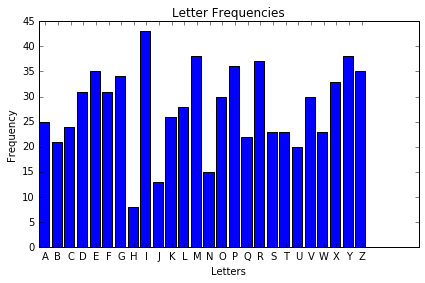

In [13]:
x = np.arange(len(alphabet))

plt.bar(x,letter_freq)

plt.xlabel('Letters')
plt.ylabel('Frequency')
plt.title('Letter Frequencies')
plt.xticks(x+0.5, alphabet)
plt.tight_layout()
plt.savefig('cpher_letter_freq.png')


# Counting Double Letter Combinations

In [14]:
digram_freq=[] #going to be a list of tuples
sorted_digram=[]
sig_digram=[]

for x in alphabet:
    for y in alphabet:
        word=x+y
        digram_freq.append((word,count_freq(cipher_text,word)))

sorted_digram=sorted(digram_freq, key=lambda digram_freq: digram_freq[1],reverse=True)  

i=0
while i<10:
    sig_digram.append(sorted_digram[i])
    i+=1

print(sig_digram)



[('SG', 8), ('YL', 8), ('IA', 7), ('PS', 7), ('CI', 6), ('GO', 6), ('IY', 6), ('RX', 6), ('UY', 6), ('XT', 6)]


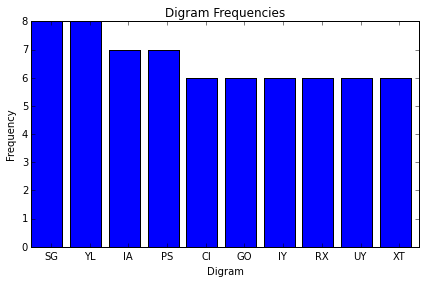

In [14]:
x_values=np.arange(len(sig_digram))
y_values=[x[1] for x in sig_digram]

digrams=[]
for x in sig_digram:
    digrams.append(x[0])



plt.bar(x_values,y_values)

plt.xlabel('Digram')
plt.ylabel('Frequency')
plt.title('Digram Frequencies')
plt.xticks(x_values+0.5, digrams)
plt.tight_layout()
plt.savefig('cipher_digram_freq.png')


#Triple Letter Frequency

In [15]:
trigram_freq=[] #going to be a list of tuples
sorted_trigram=[]
sig_trigram=[]

for x in alphabet:
    for y in alphabet:
        for z in alphabet:
            word=x+y+z
            trigram_freq.append((word,count_freq(cipher_text,word)))

sorted_trigram=sorted(trigram_freq, key=lambda trigram_freq: trigram_freq[1],reverse=True)  

i=0
while i<15:
    sig_trigram.append(sorted_trigram[i])
    i+=1

print(sig_trigram)

[('PSG', 7), ('DYI', 4), ('AGO', 3), ('CIY', 3), ('FSM', 3), ('GCI', 3), ('GRV', 3), ('KUY', 3), ('MGR', 3), ('PPS', 3), ('QYL', 3), ('SGC', 3), ('XTP', 3), ('ADF', 2), ('AFZ', 2)]


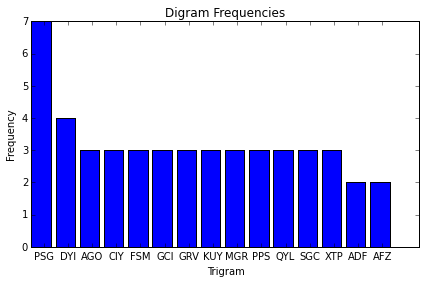

In [36]:
x_values=np.arange(len(sig_trigram))
y_values=[x[1] for x in sig_trigram]

trigrams=[]
for x in sig_trigram:
    trigrams.append(x[0])



plt.bar(x_values,y_values)

plt.xlabel('Trigram')
plt.ylabel('Frequency')
plt.title('Digram Frequencies')
plt.xticks(x_values+0.5, trigrams)
plt.tight_layout()
plt.savefig('cipher_trigram_freq.png')

# Caeser Shift Processing 

In [16]:
shift_number=15 #how many letters the alphabet is shifted by

shift_number=26-shift_number

In [17]:
i=0
while i<26:
    shift_mod=(i+shift_number)%26
    character_number=65+shift_mod
    cipher_key[i]=chr(character_number)
    i+=1

print(cipher_key)

['L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K']


# Letter Guessing:


In [18]:
#make guesses at how cipher text letters are decrypted, 
#remembering that list indexing starts from 0
cipher_key[0]="-" #guess for A
cipher_key[1]="-" #guess for B
cipher_key[2]="T" #guess for C
cipher_key[3]="A" #guess for D
cipher_key[4]="-" #guess for E
cipher_key[5]="E" #guess for F
cipher_key[6]="-" #guess for G
cipher_key[7]="-" #guess for H
cipher_key[8]="-" #guess for I
cipher_key[9]="-" #guess for J
cipher_key[10]="-" #guess for K
cipher_key[11]="-" #guess for L
cipher_key[12]="-" #guess for M
cipher_key[13]="-" #guess for N
cipher_key[14]="-" #guess for O
cipher_key[15]="-" #guess for P
cipher_key[16]="-" #guess for Q
cipher_key[17]="-" #guess for R
cipher_key[18]="-" #guess for S
cipher_key[19]="-" #guess for T
cipher_key[20]="-" #guess for U
cipher_key[21]="-" #guess for V
cipher_key[22]="-" #guess for W
cipher_key[23]="H" #guess for X
cipher_key[24]="-" #guess for Y
cipher_key[25]="-" #guess for Z






In [19]:
#build the key string for use in the translate function
alphabet_key=""
for x in cipher_key:
    alphabet_key=alphabet_key+x
print(alphabet_key)

--TA-E-----------------H--


# FINDING THE POSITION OF TRI-GRAMS IN THE CIPHER TEXT

In [20]:
#define a function to count over-lapping occurences of a sub-string in a string
def trigram_position(string, word):
    start   = 0
    locations=[]

    while True:
        start = string.find (word, start) #find returns -1 on failure 
        if start < 0:
            break

        start   += 1
        locations.append(start)


    return locations


In [21]:
print(trigram_position(cipher_text,"DYI"))

[1, 225, 421, 666]


In [22]:
positions=trigram_position(cipher_text,"DYI")

n=len(positions)
relative_positions=[]
i=0

while i<n-1:
    x=positions[i+1]-positions[i]
    relative_positions.append(x)
    i+=1

print(relative_positions)

[224, 196, 245]


In [23]:
string="THEFIRSTITEMINOURLITTLEAUCTIONWILLBETHELOCATIONOFASAFEHOUSEINTHEUKSECTOROFBERLINITISAMINORSTOPOVERONTHERATLINESBUTYOUNEVERKNOWYOUMIGHTGETLUCKYANDFINDSOMEONEINTERESTINGHIDINGTHEREATTHEVERYLEASTYOUWILLINCONVENIENCETHEREICHSDOKTORIFYOUTAKEPOSSESSIONOFITHOWMUCHWOULDTHATBEWORTHTOYOUDOIHEARABIDOFFIVEHUNDREDTHOUSANDFRANCSFROMOURFRENCHFRIENDSPERHAPSTHEBRITISHWOULDPAYMOREORMAYBETHEYCANNOTAFFORDTOIWONDERHOWTHEYFEELABOUTTHATPERHAPSYOUSHOULDASKTHEMIFYOUWANTTOOUTBIDYOURSOCALLEDFRIENDSTHENLEAVETHEMONEYINUNMARKEDTREASURYBILLSINLOCKERATTHEFARENDOFTHEPLATFORMINFRIEDRICHSTRASSEIWILLLEAVETHEDETAILSINLOCKERYOUWILLFINDTHEKEYINDONOTTRYTODOUBLECROSSMEITWILLNOTWORKANDOURLITTLEGAMEWILLENDBEFOREITHASEVENPROPERLYBEGUN"
print(trigram_position(string,"THE"))

[1, 37, 62, 101, 174, 181, 213, 344, 373, 401, 437, 477, 486, 527, 538, 577, 606]


###DEALING WITH VIGNERE CIPHER

In [16]:
def vignere(cipher,period,n,shift_number): #for cipher text, cipher, changes letters in every n-th place with a caesar shift
    
    i=0
    part_plain=[]
    while i<len(cipher):
        part_plain.append(cipher[i])
        i+=1
    
    i=0
    while i<(len(cipher_text)-n)/period:
        character=cipher[period*i+n-1] #picks up a charcter in an nth place every period
        cipher_character_number=ord(character)-65
        plain_character_number=(cipher_character_number-shift_number) % 26
        plain_character=chr(plain_character_number+65)
        part_plain[period*i+n-1]=plain_character
        i+=1
        
    #rebuild decrypt
    i=0
    part_decrypt=""
    while i<len(cipher):
        part_decrypt=part_decrypt+part_plain[i]
        i+=1
    
    return part_decrypt
        
    
    
    
    


    

In [30]:
print(vignere(cipher_text,7,2,22))

DYMMXMESTIZDPNFVZAMJRNPWGCIGRVZFSIADIGUYOGYFCFMQQIFCFSMLQFBFZBUOCWOVMECWQDDBNXUIDCIAQVLFZAGORTKZCEWFVQJIANKPQGIYERJXPQADVTXTORXTMUAZBFZLQONBBPWGEPRITIZYWGLVBDFAGOUVAYMBPPWGCIYVZMENIALVBDFAGOUBTPGOOCQQGMGRRBFSMLMRVOSMNDPWGMCGDYMKOWAYKCZOMECKIZOBUKKGAFKNXFVXJKUORBUYITKDMMYLGRZAUDVBDROMXMVPPWGEZLDFXXLGNQRUQZNPRVAEWQXOPWGCIYVZMEHMJSCTRTVQYLZEPTIOJQZLAGKCMYLBRIFCTLDRLVMZHIEXVLEZTRDLAEEIEDROMTVVMRVXPBLYLPMGMGRVIPOZRCJWRLVBDYMDDISOYWGDMNDRAYLTYNZAOZCADFVAFZBBZOUYIYZIQOPIANZEUWTVXTTGOMGRVQPPVGSKGAQIOBZBUDPQYLJXPITOEBIZZXSEOUYGBEIMYMIFCPATLTYGVAMJNBEIPGYLEOUBTZCFKELRCIAMJBAMMCKZLPTZRMKTKEWNXRKOZCADFNYJKUYFAUYOVPPWGHIADKWWYWJWFZQLJBEKBTPBEORKTPZLYWGAFZFYTIXWMQPIQQYLFDYMZWMGEJUQPBVXKPQAIEUSGFSMOBZBUDPRWSIEDGBXWZUOILKKMXPDRX


In [17]:

period=7

shift_1=-1
shift_2=-1
shift_3=4
shift_4=0
shift_5=0
shift_6=0
shift_7=0
shift_8=0

text=cipher_text

text=vignere(text,period,1,shift_1)
text=vignere(text,period,2,shift_2)
text=vignere(text,period,3,shift_3)
text=vignere(text,period,4,shift_4)
text=vignere(text,period,5,shift_5)
#text=vignere(text,period,6,shift_6)
#text=vignere(text,period,7,shift_7)

print(text)

EYIMXMETTEZDPNGVVAMJROPSGCIGSVVFSIAEICUYOGZFYFMQQJFYFSMLRFXFZBUPCSOVMEDWMDDBNYUEDCIARVHFZAGPRPKZCEXFRQJIAOKLQGIYFRFXPQAEVPXTORYTIUAZBGZHQONBCPSGEPRJTEZYWGMVXDFAGPURAYMBQPSGCIYWZIENIAMVXDFAGPUXTPGOPCMQGMGSRXFSMLNRROSMNEPSGMCGEYIKOWAZKYZOMEDKEZOBULKCAFKNYFRXJKUPRXUYITLDIMYLGSZWUDVBERKMXMVQPSGEZLEFTXLGNRRQQZNPSVWEWQXPPSGCIYWZIEHMJTCPRTVQZLVEPTIPJMZLAGLCIYLBRJFYTLDRMVIZHIEYVHEZTRELWEEIEERKMTVVNRRXPBLZLLMGMGSVEPOZRDJSRLVBEYIDDISPYSGDMNERWYLTYOZWOZCAEFRAFZBCZKUYIYAIMOPIAOZAUWTVYTPGOMGSVMPPVGTKCAQIOCZXUDPQZLFXPITPEXIZZXTEKUYGBFIIYMIFDPWTLTYHVWMJNBFILGYLEPUXTZCFLEHRCIANJXAMMCLZHPTZRNKPKEWNYRGOZCAEFJYJKUZFWUYOVQPSGHIAEKSWYWJXFVQLJBFKXTPBEPRGTPZLZWCAFZFZTEXWMQQIMQYLFEYIZWMGFJQQPBVYKLQAIEVSCFSMOCZXUDPRXSEEDGBYWVUOILLKIXPDRX


In [19]:
def vignere_split(cipher,period,n): #for cipher text, cipher, changes letters in every n-th place with a caesar shift
    

    i=0
    split=""
    while i<(len(cipher_text)-n)/period:
        character=cipher[period*i+n-1] #picks up a charcter in an nth place every period      
        split=split+character
        i+=1
        

    
    return split
        

In [24]:
print(vignere_split(cipher_text,7,2))

YTVPVIFFFCWUVRFKRVTZPTVUPZVUCRRPYKKKFRDZRPFRVPZCLJCFVVLRRLVJYYRZFZIZTVKZLEEIPVIUEJZKRFFPKFKRWTIYJKSZSWK


##Final Substitution

In [70]:
#build the key string for use in the translate function
alphabet_key=""
for x in cipher_key:
    alphabet_key=alphabet_key+x
print(alphabet_key)

--TA-E-----------------H--


In [33]:
#define string to contain plain text
plain=""

In [71]:
print(cipher_text)
print()

#define dictionary for decoding each letter
substitution=cipher_text.maketrans(alphabet_string,alphabet_key)
plain=cipher_text.translate(substitution)
print(plain)
print()
print(plain[::-1])


YDCLPCXFMYSFUCSHKSDKXAYHKCXFHNFSBOYDXSDCVFXXHAYLUVYFSKYXFSHNYFCFFSVXABCYHCSDIIDCXFOSLFCLSDCJDAXUVFSUVLFSFROLCMXYDCLPCXFMYPSFQTFSHYKDXCFPSLCSDELTKDCXFSSLDCALFOAOHDVFHOLMUPUCHQYLCQDDCASLUXFYOCLSCHDQLDKYAFOLCFAXFMOFXTFUCDCXUCPYIFFJFSLXAYFSKXHSHDBURSLFOVCDYDXOLCVLCYDVCVFSAFJLTDCRDUSLFOVCDYBXXLQTFXHKDBCYVMYYFFXYFFQXLUCXFPPHXXCIFVSFCYYLXXHSSDCJDAXUVFSKDFTLYBQDPDCXTFFXFVSHDXXFYOCLSFUCDCXXFVVLUCRYOSFQYFVSHDXLKDXSHDTHSBOYDXFBF

-AT--THE---E-T----A-H----THE--E----AH-AT-EHH-------E---HE----ETEE--H--T--T-A--ATHE---ET--AT-A-H--E----E-E---T-H-AT--THE----E--E----AHTE---T-A----ATHE---AT--E----A-E-------T----T-AAT----HE--T--T-A--A---E--TE-HE--EH-E-TATH-T---EE-E--H--E--H---A-----E--TA-AH--T--T-A-T-E--E---AT-A---E--TA--HH---EH--A-T-----EEH-EE-H--THE---HHT-E--ET---HH---AT-A-H--E--AE-----A-ATH-EEHE---AHHE--T--E-TATHHE----T----E--E---AH--AH--A------AHE-E

E-EHA------A--HA--HA---E--E----T----EHHTAT-E--T--EHHA---EHEE-HTA-A-----EA--E--H-A-TA---HH---TE--E-THH---EHT--H-EE-HEE-----T-A--HE---HH--AT--E---A-TA---E--

In [51]:
print(plain[::-1])

-AT--THE---E-T----A-H----THE--E----AH-AT-EHH-------E---HE----ETEE--H--T--T-A--ATHE---ET--AT-A-H--E----E-E---T-H-AT--THE----E--E----AHTE---T-A----ATHE---AT--E----A-E-------T----T-AAT----HE--T--T-A--A---E--TE-HE--EH-E-TATH-T---EE-E--H--E--H---A-----E--TA-AH--T--T-A-T-E--E---AT-A---E--TA--HH---EH--A-T-----EEH-EE-H--THE---HHT-E--ET---HH---AT-A-H--E--AE-----A-ATH-EEHE---AHHE--T--E-TATHHE----T----E--E---AH--AH--A------AHE-E
